In [1]:
import pandas as pd
import numpy as np

read in data, give better names

In [2]:
df = pd.read_csv('CHI_Study_000/data1/ACC.csv')

columns = df.columns

# Rename columns
new_column_names = {columns[0]: 'x', columns[1]: 'y', columns[-1]: 'z'}
df.rename(columns=new_column_names, inplace=True)

#drop the first row, it records the frequency but not real data
df = df.drop(0)

df

,x,y,z
1,-42.0,41.0,30.0
2,-39.0,40.0,31.0
3,-38.0,40.0,30.0
4,-40.0,40.0,28.0
5,-43.0,40.0,27.0
...,...,...,...
506,26.0,-4.0,56.0
507,24.0,-2.0,56.0
508,25.0,-3.0,56.0
509,26.0,-5.0,57.0


## first lets visualize the acc values

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

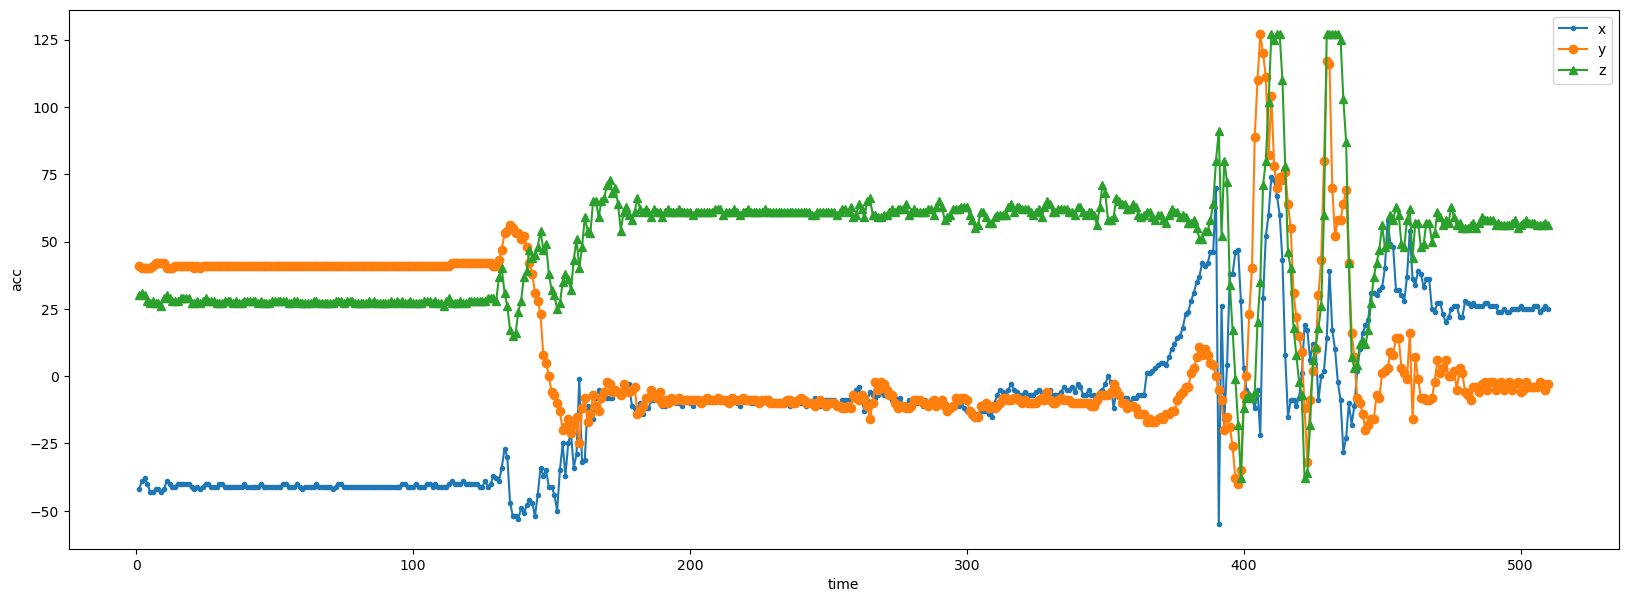

In [4]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(df['x'], marker='.', label='x')
ax.plot(df['y'], marker='o', label='y')
ax.plot(df['z'], marker='^', label='z')

ax.set_xlabel('time')
ax.set_ylabel('acc')

ax.legend()

plt.show()

## try to segment it

here, need to create a sumed column for xyz acc values

In [5]:
df.describe()

,x,y,z
count,510.000000,510.000000,510.000000
mean,-10.164706,11.005882,48.484314
std,26.501961,28.350840,22.655070
min,-55.000000,-40.000000,-38.000000
25%,-40.000000,-10.000000,28.000000
50%,-9.000000,-5.000000,57.000000
75%,-2.000000,41.000000,61.000000
max,74.000000,127.000000,127.000000


create sum column for both df

In [6]:
df['sum'] = df['x'] + df['y'] + df['z']
df

,x,y,z,sum
1,-42.0,41.0,30.0,29.0
2,-39.0,40.0,31.0,32.0
3,-38.0,40.0,30.0,32.0
4,-40.0,40.0,28.0,28.0
5,-43.0,40.0,27.0,24.0
...,...,...,...,...
506,26.0,-4.0,56.0,78.0
507,24.0,-2.0,56.0,78.0
508,25.0,-3.0,56.0,78.0
509,26.0,-5.0,57.0,78.0


In [7]:
df.isna().sum()

x      0
y      0
z      0
sum    0
dtype: int64

from the plot, we mainly see 4 bins

In [8]:
df_copy = df.copy()

bin_num = 4

df_copy['range'] = pd.cut(df_copy['sum'], bins=bin_num)
df_copy['segment'] = pd.cut(df_copy['sum'], bins=bin_num, labels=np.arange(0, bin_num))

# make sure segment is numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy['segment'] = le.fit_transform(df_copy['segment'])

df_copy

,x,y,z,sum,range,segment
1,-42.0,41.0,30.0,29.0,"(-51.356, 38.0]",0
2,-39.0,40.0,31.0,32.0,"(-51.356, 38.0]",0
3,-38.0,40.0,30.0,32.0,"(-51.356, 38.0]",0
4,-40.0,40.0,28.0,28.0,"(-51.356, 38.0]",0
5,-43.0,40.0,27.0,24.0,"(-51.356, 38.0]",0
...,...,...,...,...,...,...
506,26.0,-4.0,56.0,78.0,"(38.0, 127.0]",1
507,24.0,-2.0,56.0,78.0,"(38.0, 127.0]",1
508,25.0,-3.0,56.0,78.0,"(38.0, 127.0]",1
509,26.0,-5.0,57.0,78.0,"(38.0, 127.0]",1


In [9]:
df_copy['segment'].value_counts()

1    289
0    200
2     11
3     10
Name: segment, dtype: int64

lets see if it works

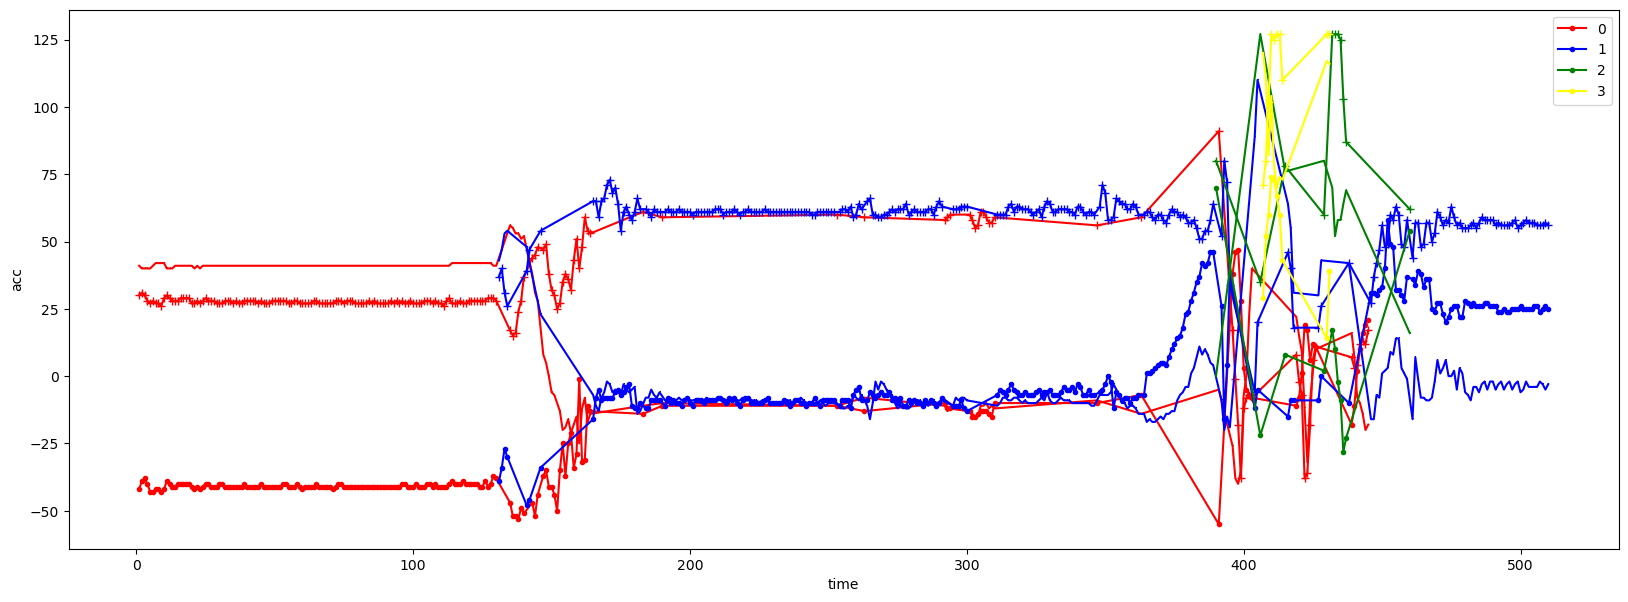

In [10]:
# Create a dictionary to map segments to colors
segment_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}  # Define your colors as needed

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 7))

# Loop through each segment and plot lines connecting the points
for segment, group in df_copy.groupby('segment'):
    ax.plot(group.index, group['x'], marker='.', label=f'{segment}', color=segment_colors[segment])
    ax.plot(group.index, group['y'], marker=',', color=segment_colors[segment])
    ax.plot(group.index, group['z'], marker='+', color=segment_colors[segment])

# Set x and y axis labels
ax.set_xlabel('time')
ax.set_ylabel('acc')

# Create a legend
ax.legend()

# Show the plot
plt.show()

## it seems using a sumed column make it lose some original segmentation, or i picked the wrong way to come up with a sum column, let me try using xyz's own labels instead of suming

In [11]:
df_copy2 = df.copy()

bin_num = 4

df_copy2['x_range'] = pd.cut(df_copy2['x'], bins=bin_num)
df_copy2['x_segment'] = pd.cut(df_copy2['x'], bins=bin_num, labels=np.arange(0, bin_num))
#df_copy2['x_segment'] = le.fit_transform(df_copy2['x_segment'])

df_copy2['y_range'] = pd.cut(df_copy2['y'], bins=bin_num)
df_copy2['y_segment'] = pd.cut(df_copy2['y'], bins=bin_num, labels=np.arange(0, bin_num))
#df_copy2['y_segment'] = le.fit_transform(df_copy2['y_segment'])

df_copy2['z_range'] = pd.cut(df_copy2['z'], bins=bin_num)
df_copy2['z_segment'] = pd.cut(df_copy2['z'], bins=bin_num, labels=np.arange(0, bin_num))
#df_copy2['z_segment'] = le.fit_transform(df_copy2['z_segment'])

df_copy2

,x,y,z,sum,x_range,x_segment,y_range,y_segment,z_range,z_segment
1,-42.0,41.0,30.0,29.0,"(-55.129, -22.75]",0,"(1.75, 43.5]",1,"(3.25, 44.5]",1
2,-39.0,40.0,31.0,32.0,"(-55.129, -22.75]",0,"(1.75, 43.5]",1,"(3.25, 44.5]",1
3,-38.0,40.0,30.0,32.0,"(-55.129, -22.75]",0,"(1.75, 43.5]",1,"(3.25, 44.5]",1
4,-40.0,40.0,28.0,28.0,"(-55.129, -22.75]",0,"(1.75, 43.5]",1,"(3.25, 44.5]",1
5,-43.0,40.0,27.0,24.0,"(-55.129, -22.75]",0,"(1.75, 43.5]",1,"(3.25, 44.5]",1
...,...,...,...,...,...,...,...,...,...,...
506,26.0,-4.0,56.0,78.0,"(9.5, 41.75]",2,"(-40.167, 1.75]",0,"(44.5, 85.75]",2
507,24.0,-2.0,56.0,78.0,"(9.5, 41.75]",2,"(-40.167, 1.75]",0,"(44.5, 85.75]",2
508,25.0,-3.0,56.0,78.0,"(9.5, 41.75]",2,"(-40.167, 1.75]",0,"(44.5, 85.75]",2
509,26.0,-5.0,57.0,78.0,"(9.5, 41.75]",2,"(-40.167, 1.75]",0,"(44.5, 85.75]",2


lets see if the segmentation labels agree with each other

In [12]:
from sklearn.metrics import adjusted_rand_score

# Calculate Rand Score
ri = adjusted_rand_score(df_copy2['x_segment'], df_copy2['y_segment'])
print(f'Kappa between x and y (rand): {ri}')

ri = adjusted_rand_score(df_copy2['x_segment'], df_copy2['z_segment'])
print(f'Kappa between x and z (rand): {ri}')

ri = adjusted_rand_score(df_copy2['y_segment'], df_copy2['z_segment'])
print(f'Kappa between y and z (rand): {ri}')

Kappa between x and y (rand): 0.4523075048390399
Kappa between x and z (rand): 0.4806949507447971
Kappa between y and z (rand): 0.5659252547098521


In [13]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(df_copy2['x_segment'], df_copy2['y_segment'])
print(f'Kappa between x and y (kappa): {kappa}')

kappa = cohen_kappa_score(df_copy2['x_segment'], df_copy2['z_segment'])
print(f'Kappa between x and z (kappa): {kappa}')

kappa = cohen_kappa_score(df_copy2['y_segment'], df_copy2['z_segment'])
print(f'Kappa between y and z (kappa): {kappa}')

Kappa between x and y (kappa): -0.47367916214547345
Kappa between x and z (kappa): -0.1409638490193057
Kappa between y and z (kappa): 0.16638735715039998


the labels barely agree

lets see

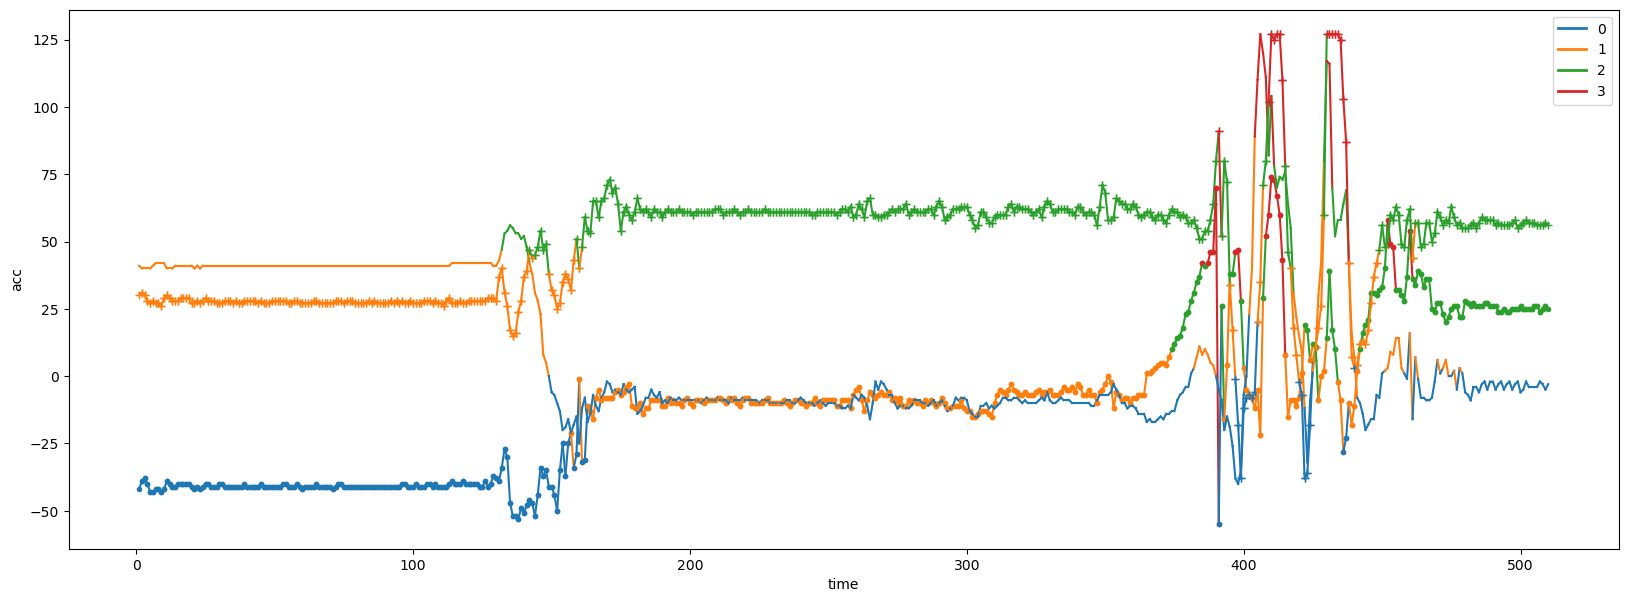

In [14]:
# Generate a colormap
colors = list(mcolors.TABLEAU_COLORS.values())
max_segment = max(df_copy2['x_segment'].max(), df_copy2['y_segment'].max(), df_copy2['z_segment'].max())
colormap = {i: colors[i % len(colors)] for i in range(max_segment + 1)}

fig, ax = plt.subplots(figsize=(20, 7))

# Iterate through the dataframe rows to plot segments with distinct colors
for i in range(1, len(df_copy2)):
    ax.plot(df_copy2['x'].iloc[i-1:i+1], c=colormap[df_copy2['x_segment'].iloc[i-1]], marker='.')
    ax.plot(df_copy2['y'].iloc[i-1:i+1], c=colormap[df_copy2['y_segment'].iloc[i-1]], marker=',')
    ax.plot(df_copy2['z'].iloc[i-1:i+1], c=colormap[df_copy2['z_segment'].iloc[i-1]], marker='+')

ax.set_xlabel('time')
ax.set_ylabel('acc')

# Create custom legend entries based on colormap
legend_entries = [plt.Line2D([0], [0], color=colormap[key], lw=2, label=str(key)) for key in colormap.keys()]
ax.legend(handles=legend_entries)

plt.show()

## still much overlapping, what about try bin_num=2?

with sum

In [15]:
df = pd.read_csv('CHI_Study_000/data1/ACC.csv')

columns = df.columns

# Rename columns
new_column_names = {columns[0]: 'x', columns[1]: 'y', columns[-1]: 'z'}
df.rename(columns=new_column_names, inplace=True)

#drop the first row, it records the frequency but not real data
df = df.drop(0)

df['sum'] = df['x'] + df['y'] + df['z']
df

df

,x,y,z,sum
1,-42.0,41.0,30.0,29.0
2,-39.0,40.0,31.0,32.0
3,-38.0,40.0,30.0,32.0
4,-40.0,40.0,28.0,28.0
5,-43.0,40.0,27.0,24.0
...,...,...,...,...
506,26.0,-4.0,56.0,78.0
507,24.0,-2.0,56.0,78.0
508,25.0,-3.0,56.0,78.0
509,26.0,-5.0,57.0,78.0


In [16]:
df_copy_sum = df.copy()

bin_num = 2

df_copy_sum['range'] = pd.cut(df_copy_sum['sum'], bins=bin_num)
df_copy_sum['segment'] = pd.cut(df_copy_sum['sum'], bins=bin_num, labels=np.arange(0, bin_num))

# make sure segment is numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy_sum['segment'] = le.fit_transform(df_copy_sum['segment'])

df_copy_sum

,x,y,z,sum,range,segment
1,-42.0,41.0,30.0,29.0,"(-51.356, 127.0]",0
2,-39.0,40.0,31.0,32.0,"(-51.356, 127.0]",0
3,-38.0,40.0,30.0,32.0,"(-51.356, 127.0]",0
4,-40.0,40.0,28.0,28.0,"(-51.356, 127.0]",0
5,-43.0,40.0,27.0,24.0,"(-51.356, 127.0]",0
...,...,...,...,...,...,...
506,26.0,-4.0,56.0,78.0,"(-51.356, 127.0]",0
507,24.0,-2.0,56.0,78.0,"(-51.356, 127.0]",0
508,25.0,-3.0,56.0,78.0,"(-51.356, 127.0]",0
509,26.0,-5.0,57.0,78.0,"(-51.356, 127.0]",0


In [17]:
df_copy_sum.groupby(['segment'])['sum'].describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
0,489.0,42.574642,24.103241,-51.0,28.0,41.0,48.0,125.0
1,21.0,206.523810,56.434581,132.0,150.0,214.0,258.0,305.0


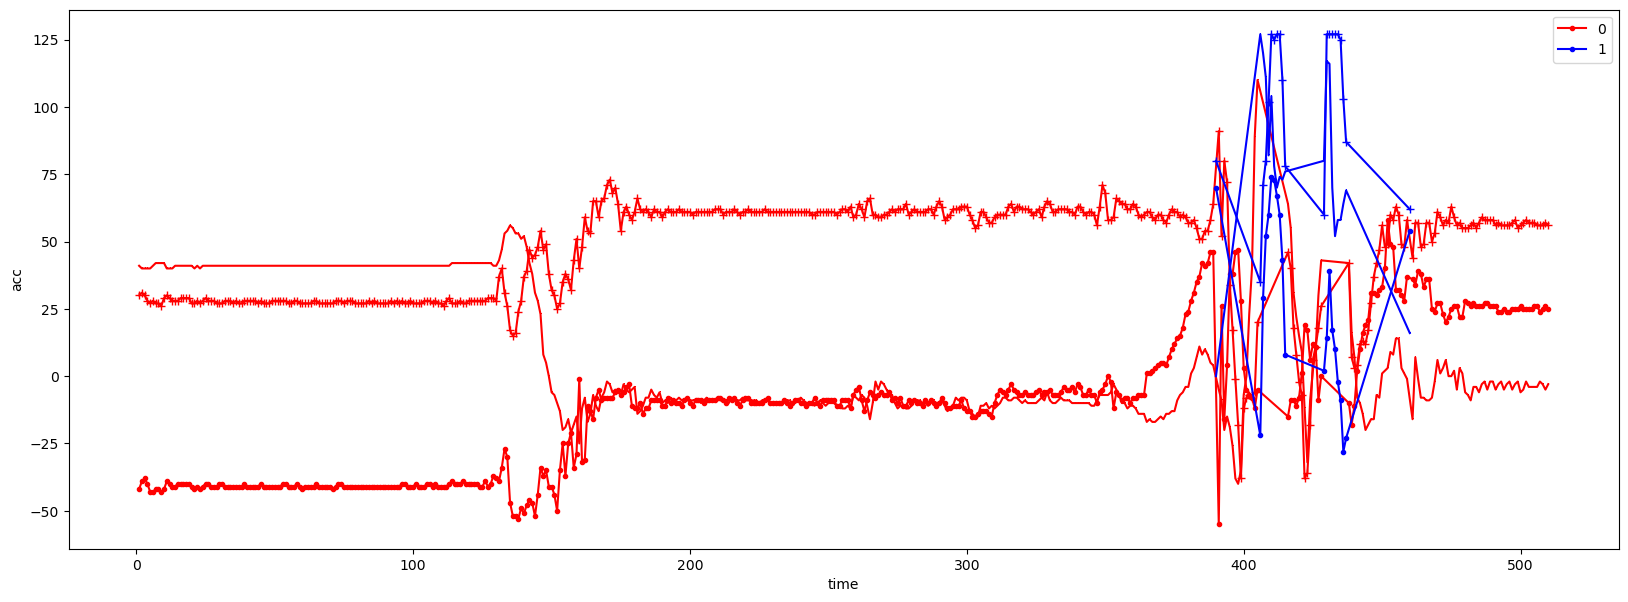

In [18]:
# Create a dictionary to map segments to colors
segment_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}  # Define your colors as needed

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 7))

# Loop through each segment and plot lines connecting the points
for segment, group in df_copy_sum.groupby('segment'):
    ax.plot(group.index, group['x'], marker='.', label=f'{segment}', color=segment_colors[segment])
    ax.plot(group.index, group['y'], marker=',', color=segment_colors[segment])
    ax.plot(group.index, group['z'], marker='+', color=segment_colors[segment])

# Set x and y axis labels
ax.set_xlabel('time')
ax.set_ylabel('acc')

# Create a legend
ax.legend()

# Show the plot
plt.show()

with individual's segmentations

In [19]:
df_copy2_indi = df.copy()

bin_num = 2

df_copy2_indi['x_range'] = pd.cut(df_copy2_indi['x'], bins=bin_num)
df_copy2_indi['x_segment'] = pd.cut(df_copy2_indi['x'], bins=bin_num, labels=np.arange(0, bin_num))
#df_copy2['x_segment'] = le.fit_transform(df_copy2['x_segment'])

df_copy2_indi['y_range'] = pd.cut(df_copy2_indi['y'], bins=bin_num)
df_copy2_indi['y_segment'] = pd.cut(df_copy2_indi['y'], bins=bin_num, labels=np.arange(0, bin_num))
#df_copy2['y_segment'] = le.fit_transform(df_copy2['y_segment'])

df_copy2_indi['z_range'] = pd.cut(df_copy2_indi['z'], bins=bin_num)
df_copy2_indi['z_segment'] = pd.cut(df_copy2_indi['z'], bins=bin_num, labels=np.arange(0, bin_num))
#df_copy2['z_segment'] = le.fit_transform(df_copy2['z_segment'])

df_copy2_indi

,x,y,z,sum,x_range,x_segment,y_range,y_segment,z_range,z_segment
1,-42.0,41.0,30.0,29.0,"(-55.129, 9.5]",0,"(-40.167, 43.5]",0,"(-38.165, 44.5]",0
2,-39.0,40.0,31.0,32.0,"(-55.129, 9.5]",0,"(-40.167, 43.5]",0,"(-38.165, 44.5]",0
3,-38.0,40.0,30.0,32.0,"(-55.129, 9.5]",0,"(-40.167, 43.5]",0,"(-38.165, 44.5]",0
4,-40.0,40.0,28.0,28.0,"(-55.129, 9.5]",0,"(-40.167, 43.5]",0,"(-38.165, 44.5]",0
5,-43.0,40.0,27.0,24.0,"(-55.129, 9.5]",0,"(-40.167, 43.5]",0,"(-38.165, 44.5]",0
...,...,...,...,...,...,...,...,...,...,...
506,26.0,-4.0,56.0,78.0,"(9.5, 74.0]",1,"(-40.167, 43.5]",0,"(44.5, 127.0]",1
507,24.0,-2.0,56.0,78.0,"(9.5, 74.0]",1,"(-40.167, 43.5]",0,"(44.5, 127.0]",1
508,25.0,-3.0,56.0,78.0,"(9.5, 74.0]",1,"(-40.167, 43.5]",0,"(44.5, 127.0]",1
509,26.0,-5.0,57.0,78.0,"(9.5, 74.0]",1,"(-40.167, 43.5]",0,"(44.5, 127.0]",1


In [20]:
'x_segment'[0]

'x'

In [21]:
segs = ['x_segment', 'y_segment', 'z_segment']

for segments in segs:
    print(df_copy2_indi.groupby([segments])[segments[0]].describe())
    print('-------------------')

           count       mean        std   min   25%   50%    75%   max
x_segment                                                            
0          402.0 -21.149254  16.552271 -55.0 -41.0 -11.0  -8.00   8.0
1          108.0  30.722222  13.177319  10.0  24.0  26.0  36.25  74.0
-------------------
           count       mean        std   min   25%   50%   75%    max
y_segment                                                            
0          477.0   6.654088  22.945951 -40.0 -10.0  -6.0  41.0   43.0
1           33.0  73.909091  24.295529  47.0  54.0  69.0  82.0  127.0
-------------------
           count       mean        std   min   25%   50%   75%    max
z_segment                                                            
0          189.0  24.460317  12.883057 -38.0  27.0  27.0  28.0   44.0
1          321.0  62.629283  13.315274  45.0  58.0  61.0  62.0  127.0
-------------------


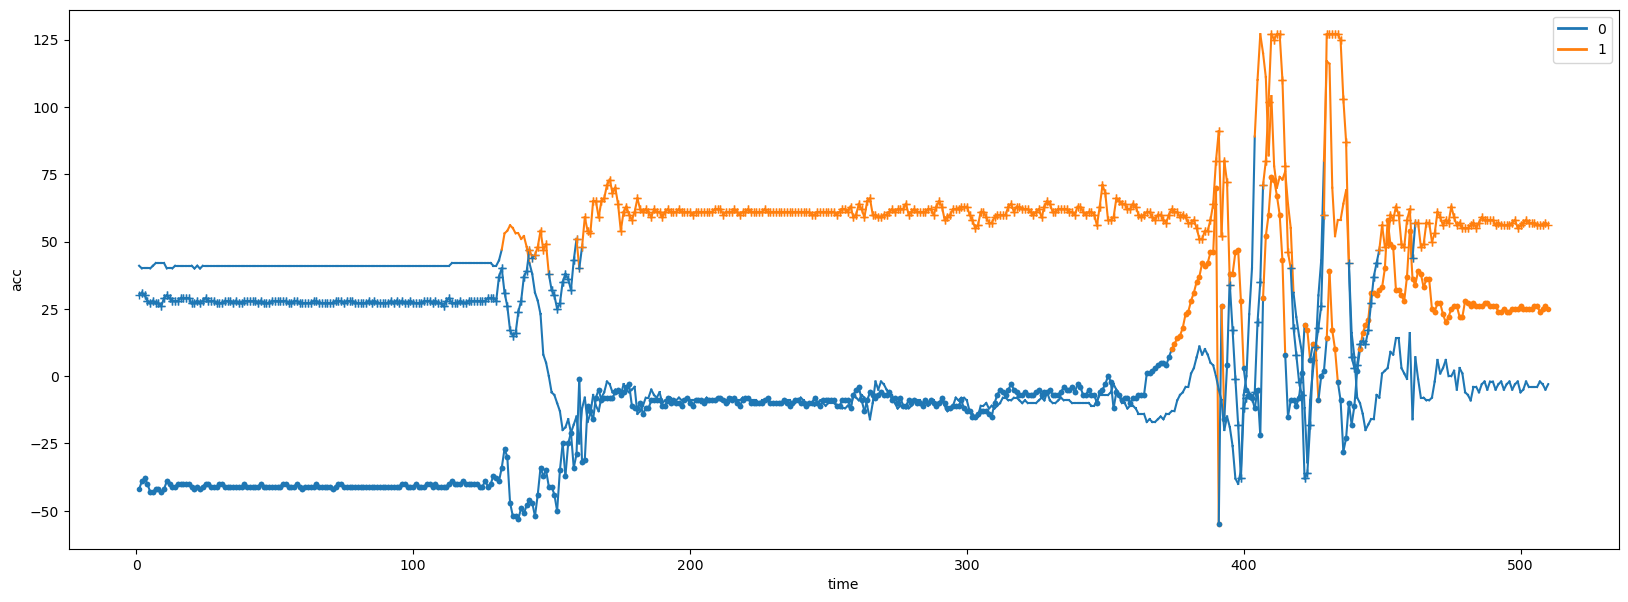

In [22]:
# Generate a colormap
colors = list(mcolors.TABLEAU_COLORS.values())
max_segment = max(df_copy2_indi['x_segment'].max(), df_copy2_indi['y_segment'].max(), df_copy2_indi['z_segment'].max())
colormap = {i: colors[i % len(colors)] for i in range(max_segment + 1)}

fig, ax = plt.subplots(figsize=(20, 7))

# Iterate through the dataframe rows to plot segments with distinct colors
for i in range(1, len(df_copy2_indi)):
    ax.plot(df_copy2_indi['x'].iloc[i-1:i+1], c=colormap[df_copy2_indi['x_segment'].iloc[i-1]], marker='.')
    ax.plot(df_copy2_indi['y'].iloc[i-1:i+1], c=colormap[df_copy2_indi['y_segment'].iloc[i-1]], marker=',')
    ax.plot(df_copy2_indi['z'].iloc[i-1:i+1], c=colormap[df_copy2_indi['z_segment'].iloc[i-1]], marker='+')

ax.set_xlabel('time')
ax.set_ylabel('acc')

# Create custom legend entries based on colormap
legend_entries = [plt.Line2D([0], [0], color=colormap[key], lw=2, label=str(key)) for key in colormap.keys()]
ax.legend(handles=legend_entries)

plt.show()

## still not really good, need de-noising before hand

In [23]:
df = pd.read_csv('CHI_Study_000/data1/ACC.csv')

columns = df.columns

# Rename columns
new_column_names = {columns[0]: 'x', columns[1]: 'y', columns[-1]: 'z'}
df.rename(columns=new_column_names, inplace=True)

#drop the first row, it records the frequency but not real data
df = df.drop(0)

#df['sum'] = df['x'] + df['y'] + df['z']
#df

df

,x,y,z
1,-42.0,41.0,30.0
2,-39.0,40.0,31.0
3,-38.0,40.0,30.0
4,-40.0,40.0,28.0
5,-43.0,40.0,27.0
...,...,...,...
506,26.0,-4.0,56.0
507,24.0,-2.0,56.0
508,25.0,-3.0,56.0
509,26.0,-5.0,57.0


apply Gaussian Filter

In [31]:
from scipy.ndimage import gaussian_filter

data = df[['x', 'y', 'z']].to_numpy()

# Range of sigma values
sigmas = np.arange(41)
# Initialize variables to keep track of the best sigma and its corresponding std
best_sigma = None
best_std = float('inf')  # Set to positive infinity initially
std_values=[]

for sigma in sigmas:
    try:
        # Apply  filter
        filtered_data = gaussian_filter(data, sigma=sigma)
        
        # Calculate the std of the filtered data
        std = np.std(filtered_data)
        std_values.append(std)
        # Check if this std is better (lower) than the best std so far
        if std < best_std:
            best_std = std
            best_sigma = sigma
        
        # Successfully processed sigma
        print(f"Processed sigma = {sigma}, Std = {std}")
        
    except Exception as e:
        # Skip error
        continue

# Print the best sigma found
print(f"Best sigma: {best_sigma}, Best Std: {best_std}")

Processed sigma = 0, Std = 35.49457588015807
Processed sigma = 1, Std = 20.185270646011457
Processed sigma = 2, Std = 12.73487892286976
Processed sigma = 3, Std = 11.276364286564084
Processed sigma = 4, Std = 10.194989901550393
Processed sigma = 5, Std = 9.34733980121814
Processed sigma = 6, Std = 8.776799427106269
Processed sigma = 7, Std = 8.430550017581112
Processed sigma = 8, Std = 8.228019991854188
Processed sigma = 9, Std = 8.104951487903579
Processed sigma = 10, Std = 8.022538226084196
Processed sigma = 11, Std = 7.960669747416194
Processed sigma = 12, Std = 7.909709349004283
Processed sigma = 13, Std = 7.865121097364263
Processed sigma = 14, Std = 7.824682544712965
Processed sigma = 15, Std = 7.787203149835682
Processed sigma = 16, Std = 7.751970713909768
Processed sigma = 17, Std = 7.718515614626425
Processed sigma = 18, Std = 7.68650623287706
Processed sigma = 19, Std = 7.655697729321525
Processed sigma = 20, Std = 7.6259037515941515
Processed sigma = 21, Std = 7.596979202081

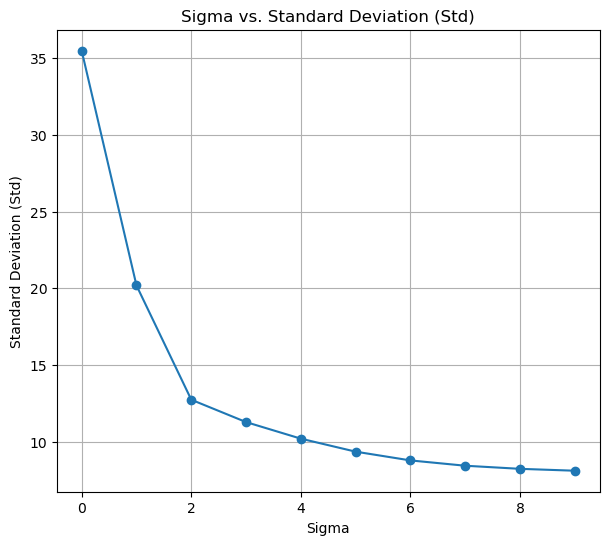

In [35]:
plt.figure(figsize=(7, 6))
plt.plot(sigmas[:10], std_values[:10], marker='o', linestyle='-')
plt.title('Sigma vs. Standard Deviation (Std)')
plt.xlabel('Sigma')
plt.ylabel('Standard Deviation (Std)')
plt.grid(True)
plt.show()

1 and 2 are all too much for the data, too smoothed

In [57]:
from scipy.ndimage import gaussian_filter

data = df[['x', 'y', 'z']].to_numpy()

# Range of sigma values
sigmas = np.arange(0, 2, 0.1)
# Initialize variables to keep track of the best sigma and its corresponding std
best_sigma = None
best_std = float('inf')  # Set to positive infinity initially
std_values=[]

for sigma in sigmas:
    try:
        # Apply  filter
        filtered_data = gaussian_filter(data, sigma=sigma)
        
        # Calculate the std of the filtered data
        std = np.std(filtered_data)
        std_values.append(std)
        # Check if this std is better (lower) than the best std so far
        if std < best_std:
            best_std = std
            best_sigma = sigma
        
        # Successfully processed sigma
        print(f"Processed sigma = {sigma}, Std = {std}")
        
    except Exception as e:
        # Skip error
        continue

# Print the best sigma found
print(f"Best sigma: {best_sigma}, Best Std: {best_std}")

Processed sigma = 0.0, Std = 35.49457588015807
Processed sigma = 0.1, Std = 35.49457588015807
Processed sigma = 0.2, Std = 35.494377139163056
Processed sigma = 0.30000000000000004, Std = 35.290332444213135
Processed sigma = 0.4, Std = 33.380328435126266
Processed sigma = 0.5, Std = 30.09672861926576
Processed sigma = 0.6000000000000001, Std = 27.244836706412894
Processed sigma = 0.7000000000000001, Std = 25.056026538360673
Processed sigma = 0.8, Std = 23.241993623675587
Processed sigma = 0.9, Std = 21.63744170666541
Processed sigma = 1.0, Std = 20.185270646011457
Processed sigma = 1.1, Std = 18.86805997485668
Processed sigma = 1.2000000000000002, Std = 17.682699081737823
Processed sigma = 1.3, Std = 16.632492132917676
Processed sigma = 1.4000000000000001, Std = 15.720356890479826
Processed sigma = 1.5, Std = 14.945275256138341
Processed sigma = 1.6, Std = 14.300735278029267
Processed sigma = 1.7000000000000002, Std = 13.774099869634956
Processed sigma = 1.8, Std = 13.349888148397957
Pr

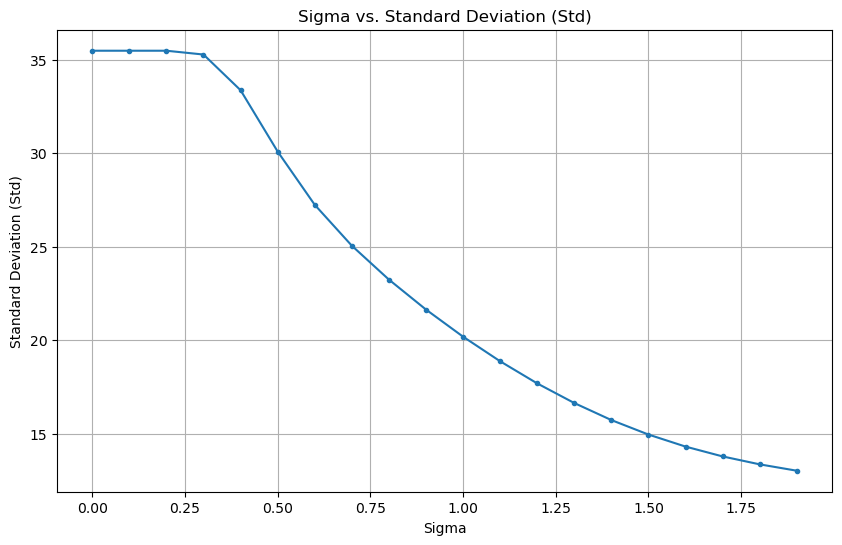

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(sigmas, std_values, marker='.', linestyle='-')
plt.title('Sigma vs. Standard Deviation (Std)')
plt.xlabel('Sigma')
plt.ylabel('Standard Deviation (Std)')
plt.grid(True)
plt.show()

In [67]:
sigma=0.5

filtered_data = gaussian_filter(data, sigma)
filtered_data

array([[-32.84823691,  30.93034265,  31.23882977],
       [-30.73080976,  30.64738586,  31.76222453],
       [-29.94562484,  30.56354217,  30.95337707],
       ...,
       [ 22.00904569,   6.21162283,  49.77933148],
       [ 22.5547174 ,   5.21484302,  50.23043958],
       [ 22.09272058,   6.13907223,  49.76820719]])

lets just pick 0.5, now the data is smoothed, lets visualize it

In [68]:
gaussiandf = pd.DataFrame(filtered_data, columns=['x', 'y', 'z'])
gaussiandf

,x,y,z
0,-32.848237,30.930343,31.238830
1,-30.730810,30.647386,31.762225
2,-29.945625,30.563542,30.953377
3,-31.540364,30.182489,29.358402
4,-33.826140,29.896594,28.571153
...,...,...,...
505,22.638656,5.760599,49.707196
506,21.485774,6.746047,49.768443
507,22.009046,6.211623,49.779331
508,22.554717,5.214843,50.230440


individual segmentation

In [70]:
gaussiandf_copy_indi = gaussiandf.copy()

bin_num = 2

gaussiandf_copy_indi['x_range'] = pd.cut(gaussiandf_copy_indi['x'], bins=bin_num)
gaussiandf_copy_indi['x_segment'] = pd.cut(gaussiandf_copy_indi['x'], bins=bin_num, labels=np.arange(0, bin_num))

gaussiandf_copy_indi['y_range'] = pd.cut(gaussiandf_copy_indi['y'], bins=bin_num)
gaussiandf_copy_indi['y_segment'] = pd.cut(gaussiandf_copy_indi['y'], bins=bin_num, labels=np.arange(0, bin_num))

gaussiandf_copy_indi['z_range'] = pd.cut(gaussiandf_copy_indi['z'], bins=bin_num)
gaussiandf_copy_indi['z_segment'] = pd.cut(gaussiandf_copy_indi['z'], bins=bin_num, labels=np.arange(0, bin_num))

gaussiandf_copy_indi

,x,y,z,x_range,x_segment,y_range,y_segment,z_range,z_segment
0,-32.848237,30.930343,31.238830,"(-43.826, 15.764]",0,"(-28.167, 38.298]",0,"(-33.69, 45.87]",0
1,-30.730810,30.647386,31.762225,"(-43.826, 15.764]",0,"(-28.167, 38.298]",0,"(-33.69, 45.87]",0
2,-29.945625,30.563542,30.953377,"(-43.826, 15.764]",0,"(-28.167, 38.298]",0,"(-33.69, 45.87]",0
3,-31.540364,30.182489,29.358402,"(-43.826, 15.764]",0,"(-28.167, 38.298]",0,"(-33.69, 45.87]",0
4,-33.826140,29.896594,28.571153,"(-43.826, 15.764]",0,"(-28.167, 38.298]",0,"(-33.69, 45.87]",0
...,...,...,...,...,...,...,...,...,...
505,22.638656,5.760599,49.707196,"(15.764, 75.236]",1,"(-28.167, 38.298]",0,"(45.87, 125.272]",1
506,21.485774,6.746047,49.768443,"(15.764, 75.236]",1,"(-28.167, 38.298]",0,"(45.87, 125.272]",1
507,22.009046,6.211623,49.779331,"(15.764, 75.236]",1,"(-28.167, 38.298]",0,"(45.87, 125.272]",1
508,22.554717,5.214843,50.230440,"(15.764, 75.236]",1,"(-28.167, 38.298]",0,"(45.87, 125.272]",1


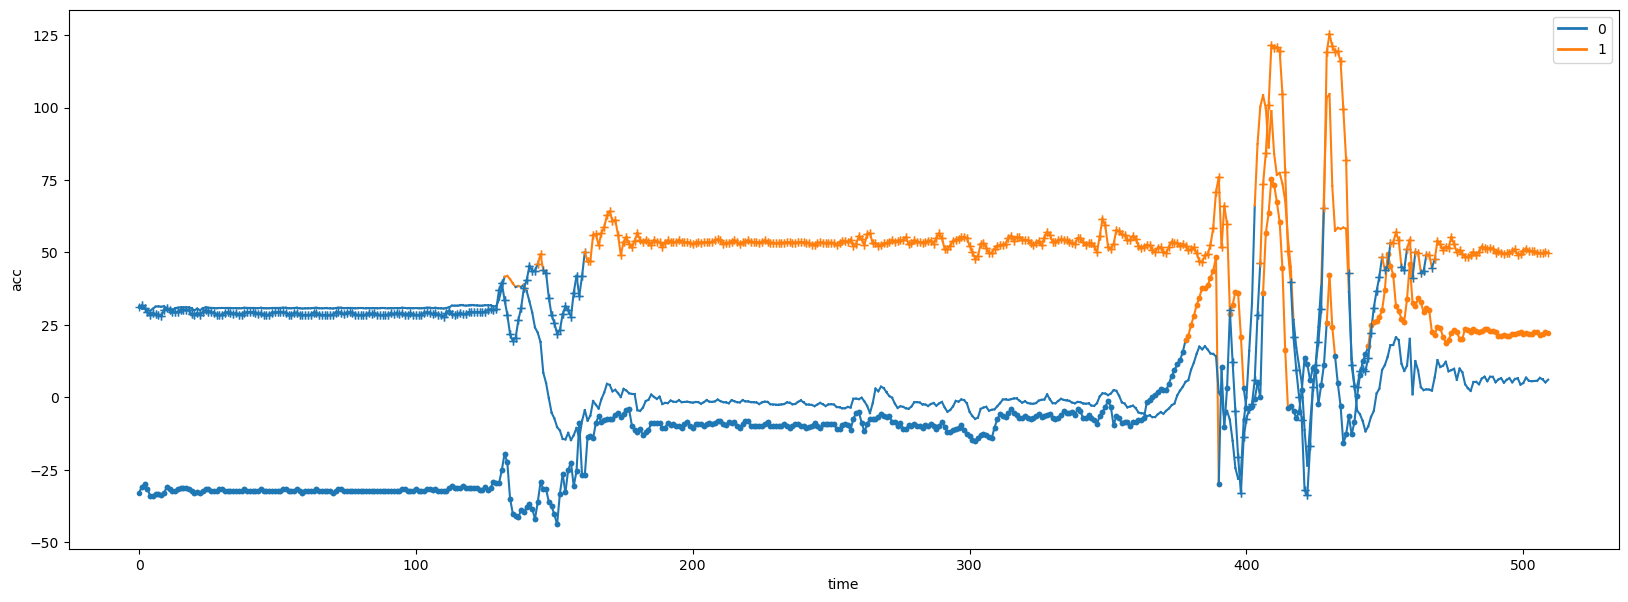

In [71]:
# Generate a colormap
colors = list(mcolors.TABLEAU_COLORS.values())
max_segment = max(gaussiandf_copy_indi['x_segment'].max(), gaussiandf_copy_indi['y_segment'].max(), gaussiandf_copy_indi['z_segment'].max())
colormap = {i: colors[i % len(colors)] for i in range(max_segment + 1)}

fig, ax = plt.subplots(figsize=(20, 7))

# Iterate through the dataframe rows to plot segments with distinct colors
for i in range(1, len(df_copy2_indi)):
    ax.plot(gaussiandf_copy_indi['x'].iloc[i-1:i+1], c=colormap[gaussiandf_copy_indi['x_segment'].iloc[i-1]], marker='.')
    ax.plot(gaussiandf_copy_indi['y'].iloc[i-1:i+1], c=colormap[gaussiandf_copy_indi['y_segment'].iloc[i-1]], marker=',')
    ax.plot(gaussiandf_copy_indi['z'].iloc[i-1:i+1], c=colormap[gaussiandf_copy_indi['z_segment'].iloc[i-1]], marker='+')

ax.set_xlabel('time')
ax.set_ylabel('acc')

# Create custom legend entries based on colormap
legend_entries = [plt.Line2D([0], [0], color=colormap[key], lw=2, label=str(key)) for key in colormap.keys()]
ax.legend(handles=legend_entries)

plt.show()

seems most of the label2 segment labels come from z-axis data, lets look into how each axis's figures' magnitudes and other stat figures differ from others

In [94]:
segs = ['x_segment', 'y_segment', 'z_segment']

for segments in segs:
    print(gaussiandf_copy_indi.groupby([segments])[segments[0]].describe())
    print('---------------------------------------------------------------------------')

           count       mean        std        min        25%        50%  \
x_segment                                                                 
0          415.0 -16.553558  13.438095 -43.707265 -31.702093 -10.322903   
1           95.0  29.955967  12.202268  16.253022  22.081672  24.332923   

                 75%        max  
x_segment                        
0          -7.320432  15.651803  
1          34.049256  75.235853  
---------------------------------------------------------------------------
           count       mean        std        min        25%        50%  \
y_segment                                                                 
0          480.0   9.285308  15.317789 -28.033847  -2.030630   2.125495   
1           30.0  68.119924  22.573467  38.437826  47.426946  66.982969   

                 75%         max  
y_segment                         
0          30.746931   38.113641  
1          85.618186  104.630523  
----------------------------------------------

seems z-axis has figrures that are overall higher than the other 2 axis, lets see how segment labels vs axis figures is

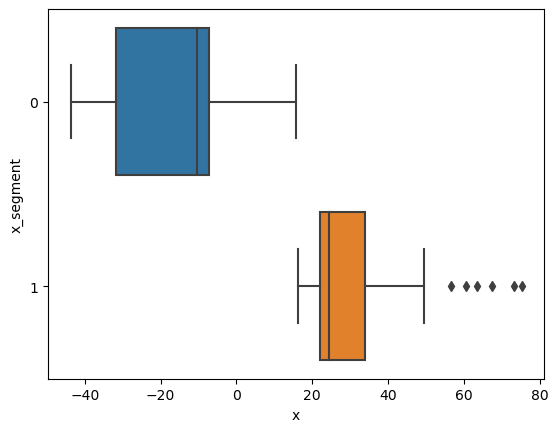

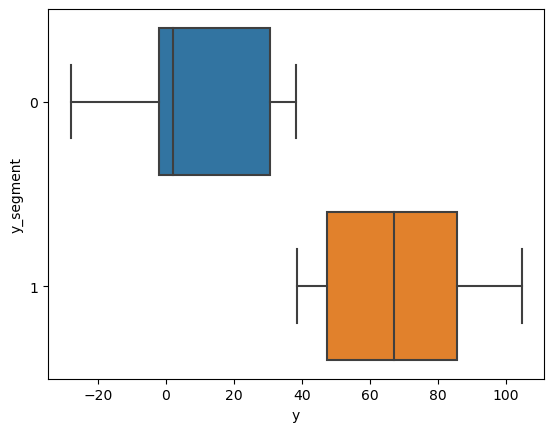

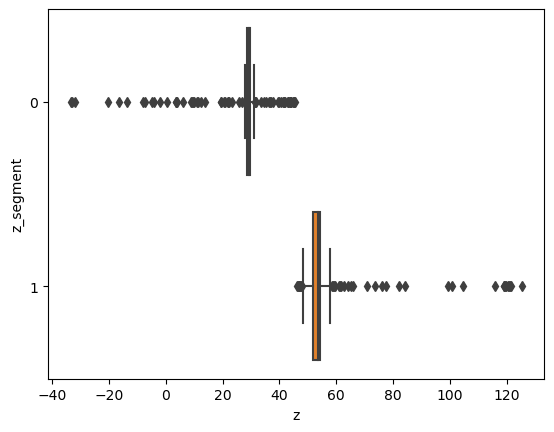

In [101]:
import seaborn as sns

for axis, segs in zip(['x', 'y', 'z'], ['x_segment', 'y_segment', 'z_segment']):
    sns.boxplot(x=axis, y=segs, data=gaussiandf_copy_indi)
    plt.show()

In [103]:
gaussiandf_copy_indi

,x,y,z,x_range,x_segment,y_range,y_segment,z_range,z_segment
0,-32.848237,30.930343,31.238830,"(-43.826, 15.764]",0,"(-28.167, 38.298]",0,"(-33.69, 45.87]",0
1,-30.730810,30.647386,31.762225,"(-43.826, 15.764]",0,"(-28.167, 38.298]",0,"(-33.69, 45.87]",0
2,-29.945625,30.563542,30.953377,"(-43.826, 15.764]",0,"(-28.167, 38.298]",0,"(-33.69, 45.87]",0
3,-31.540364,30.182489,29.358402,"(-43.826, 15.764]",0,"(-28.167, 38.298]",0,"(-33.69, 45.87]",0
4,-33.826140,29.896594,28.571153,"(-43.826, 15.764]",0,"(-28.167, 38.298]",0,"(-33.69, 45.87]",0
...,...,...,...,...,...,...,...,...,...
505,22.638656,5.760599,49.707196,"(15.764, 75.236]",1,"(-28.167, 38.298]",0,"(45.87, 125.272]",1
506,21.485774,6.746047,49.768443,"(15.764, 75.236]",1,"(-28.167, 38.298]",0,"(45.87, 125.272]",1
507,22.009046,6.211623,49.779331,"(15.764, 75.236]",1,"(-28.167, 38.298]",0,"(45.87, 125.272]",1
508,22.554717,5.214843,50.230440,"(15.764, 75.236]",1,"(-28.167, 38.298]",0,"(45.87, 125.272]",1


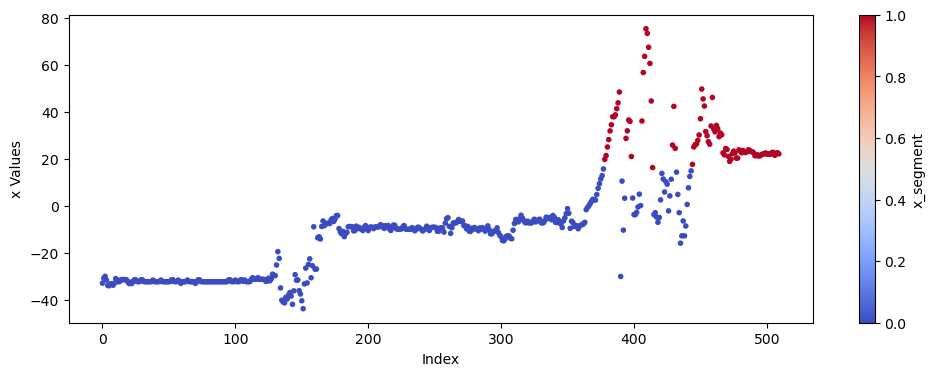

In [108]:
# Extract 'x' and 'x_segment' columns from the DataFrame
x_values = gaussiandf_copy_indi['x']
x_segment_values = gaussiandf_copy_indi['x_segment']

# Create a scatter plot
plt.figure(figsize=(12, 4))
plt.scatter(x_values.index, x_values, c=x_segment_values, cmap='coolwarm', marker='.')

# Add labels to the axes
plt.xlabel('Index')
plt.ylabel('x Values')

# Show the colorbar to indicate the mapping of colors to values
plt.colorbar(label='x_segment')

# Display the plot
plt.show()

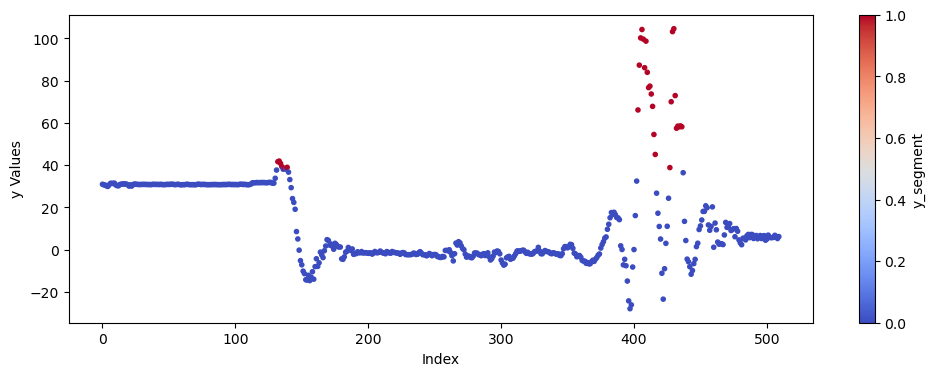

In [111]:
# Extract 'x' and 'x_segment' columns from the DataFrame
y_values = gaussiandf_copy_indi['y']
y_segment_values = gaussiandf_copy_indi['y_segment']

# Create a scatter plot
plt.figure(figsize=(12, 4))
plt.scatter(y_values.index, y_values, c=y_segment_values, cmap='coolwarm', marker='.')

# Add labels to the axes
plt.xlabel('Index')
plt.ylabel('y Values')

# Show the colorbar to indicate the mapping of colors to values
plt.colorbar(label='y_segment')

# Display the plot
plt.show()

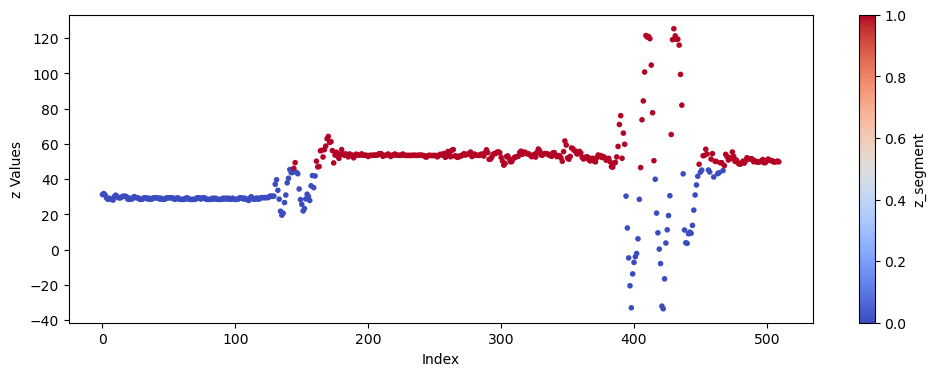

In [112]:
# Extract 'x' and 'x_segment' columns from the DataFrame
z_values = gaussiandf_copy_indi['z']
z_segment_values = gaussiandf_copy_indi['z_segment']

# Create a scatter plot
plt.figure(figsize=(12, 4))
plt.scatter(z_values.index, z_values, c=z_segment_values, cmap='coolwarm', marker='.')

# Add labels to the axes
plt.xlabel('Index')
plt.ylabel('z Values')

# Show the colorbar to indicate the mapping of colors to values
plt.colorbar(label='z_segment')

# Display the plot
plt.show()

## now i think we may need to use other methods than pd.cut(), next step is to try:

### 1. find_peaks(data, height=5)

### 2. np.split(data, np.where(data > threshold)[0] + 1)

### 3. [df[i:i+window_size] for i in range(0, len(df), window_size)]